# WeatherPy

---

## Generate Random Geographic Coordinates and a List of Cities

In [11]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
import requests
import time
import json

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 595


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f'{url}appid={weather_api_key}&q={city}&units=metric'
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | butaritari
Processing Record 2 of Set 1 | saint george
Processing Record 3 of Set 1 | dikson
Processing Record 4 of Set 1 | yining
Processing Record 5 of Set 1 | lucea
Processing Record 6 of Set 1 | san patricio
Processing Record 7 of Set 1 | ranong
Processing Record 8 of Set 1 | la ronge
Processing Record 9 of Set 1 | yelahanka
Processing Record 10 of Set 1 | eureka
Processing Record 11 of Set 1 | punta arenas
Processing Record 12 of Set 1 | meadow lake
Processing Record 13 of Set 1 | thompson
Processing Record 14 of Set 1 | rocha
Processing Record 15 of Set 1 | kaitangata
Processing Record 16 of Set 1 | cabo san lucas
Processing Record 17 of Set 1 | east london
Processing Record 18 of Set 1 | new norfolk
Processing Record 19 of Set 1 | saint anthony
Processing Record 20 of Set 1 | dehui
Processing Record 21 of Set 1 | akureyri
Processing Record 22 of Set 1 | seoul
Processing Record 23 of Set 1 

Processing Record 38 of Set 4 | mataram
Processing Record 39 of Set 4 | ampanihy
Processing Record 40 of Set 4 | lagoa
Processing Record 41 of Set 4 | tura
Processing Record 42 of Set 4 | assiniboia
Processing Record 43 of Set 4 | navrongo
Processing Record 44 of Set 4 | sola
Processing Record 45 of Set 4 | tukrah
Processing Record 46 of Set 4 | anadyr
Processing Record 47 of Set 4 | keetmanshoop
Processing Record 48 of Set 4 | chuy
Processing Record 49 of Set 4 | torbay
Processing Record 0 of Set 5 | kalmunai
Processing Record 1 of Set 5 | collie
Processing Record 2 of Set 5 | pafos
Processing Record 3 of Set 5 | tekeli
Processing Record 4 of Set 5 | recife
Processing Record 5 of Set 5 | sambava
Processing Record 6 of Set 5 | tongren
Processing Record 7 of Set 5 | puerto ayora
Processing Record 8 of Set 5 | katha
City not found. Skipping...
Processing Record 9 of Set 5 | ngorongoro
Processing Record 10 of Set 5 | georgiyevka
Processing Record 11 of Set 5 | dawei
Processing Record 12 o

Processing Record 29 of Set 8 | christchurch
Processing Record 30 of Set 8 | nhulunbuy
Processing Record 31 of Set 8 | honiara
Processing Record 32 of Set 8 | muravlenko
Processing Record 33 of Set 8 | yanchukan
City not found. Skipping...
Processing Record 34 of Set 8 | itarema
Processing Record 35 of Set 8 | fort nelson
Processing Record 36 of Set 8 | santa rosa
Processing Record 37 of Set 8 | filiatra
Processing Record 38 of Set 8 | doka
Processing Record 39 of Set 8 | necochea
Processing Record 40 of Set 8 | novyy buh
Processing Record 41 of Set 8 | wundanyi
Processing Record 42 of Set 8 | vardo
Processing Record 43 of Set 8 | raja sansi
Processing Record 44 of Set 8 | lephepe
City not found. Skipping...
Processing Record 45 of Set 8 | bahia de caraquez
Processing Record 46 of Set 8 | kaura namoda
Processing Record 47 of Set 8 | touros
Processing Record 48 of Set 8 | poya
Processing Record 49 of Set 8 | vanimo
Processing Record 0 of Set 9 | inuvik
Processing Record 1 of Set 9 | mar

Processing Record 17 of Set 12 | elizabeth city
Processing Record 18 of Set 12 | smithers
Processing Record 19 of Set 12 | charcas
Processing Record 20 of Set 12 | omboue
Processing Record 21 of Set 12 | sisimiut
Processing Record 22 of Set 12 | caborca
Processing Record 23 of Set 12 | barra do garcas
Processing Record 24 of Set 12 | ancud
Processing Record 25 of Set 12 | lashio
Processing Record 26 of Set 12 | mao
Processing Record 27 of Set 12 | novoselitskoye
Processing Record 28 of Set 12 | acajutla
Processing Record 29 of Set 12 | bukoba
Processing Record 30 of Set 12 | mogadishu
Processing Record 31 of Set 12 | rawson
Processing Record 32 of Set 12 | san quintin
Processing Record 33 of Set 12 | padilla
Processing Record 34 of Set 12 | garowe
Processing Record 35 of Set 12 | torzhok
Processing Record 36 of Set 12 | nizwa
Processing Record 37 of Set 12 | parabel
Processing Record 38 of Set 12 | chagda
City not found. Skipping...
Processing Record 39 of Set 12 | sakaiminato
Processi

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          552
Lat           552
Lng           552
Max Temp      552
Humidity      552
Cloudiness    552
Wind Speed    552
Country       552
Date          552
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,butaritari,3.0707,172.7902,27.23,79,99,8.19,KI,1674619315
1,saint george,37.1041,-113.5841,4.41,46,14,3.13,US,1674619026
2,dikson,73.5069,80.5464,-18.42,93,100,12.67,RU,1674619316
3,yining,29.0361,114.5636,6.24,33,0,0.17,CN,1674619316
4,lucea,18.4510,-78.1736,23.25,73,34,4.76,JM,1674619317


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,butaritari,3.0707,172.7902,27.23,79,99,8.19,KI,1674619315
1,saint george,37.1041,-113.5841,4.41,46,14,3.13,US,1674619026
2,dikson,73.5069,80.5464,-18.42,93,100,12.67,RU,1674619316
3,yining,29.0361,114.5636,6.24,33,0,0.17,CN,1674619316
4,lucea,18.4510,-78.1736,23.25,73,34,4.76,JM,1674619317


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

The correlation between latitude and temperature is -0.78


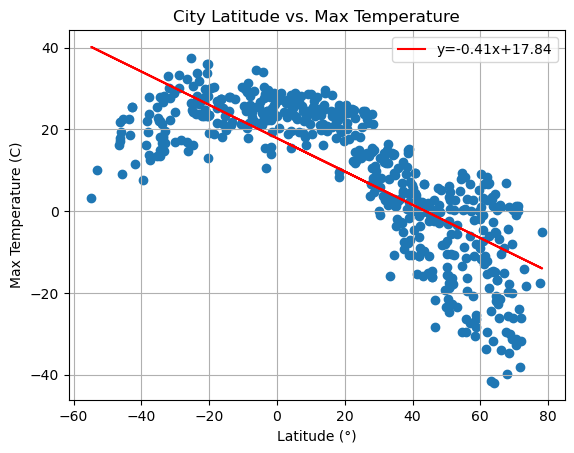

In [12]:
#Compute linear regression for latitude vs. temperature
x_values = city_data_df["Lat"]
y_values = city_data_df["Max Temp"]

correlation = round(st.pearsonr(x_values, y_values)[0],2)
print(f'The correlation between latitude and temperature is {correlation}')

(slope, intercept, r, p, se) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Build scatter plot + regression line for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker = "o")
plt.plot(x_values, regress_values, "r-", label= "y={:.2f}x+{:.2f}".format(slope,intercept))

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature")
plt.ylabel("Max Temperature (C)")
plt.xlabel("Latitude (°)")
plt.grid(True)
plt.legend()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

The correlation between latitude and humidity is 0.22


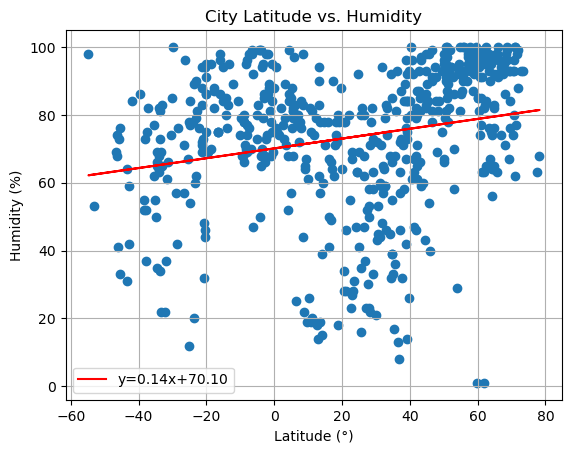

In [13]:
#Compute linear regression for latitude vs. humidity
x_values = city_data_df["Lat"]
y_values = city_data_df["Humidity"]

correlation = round(st.pearsonr(x_values, y_values)[0],2)
print(f'The correlation between latitude and humidity is {correlation}')

(slope, intercept, r, p, se) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Build scatter plot + regression line for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker = "o")
plt.plot(x_values, regress_values, "r-", label= "y={:.2f}x+{:.2f}".format(slope,intercept))

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude (°)")
plt.grid(True)
plt.legend()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

The correlation between latitude and cloudiness is 0.21


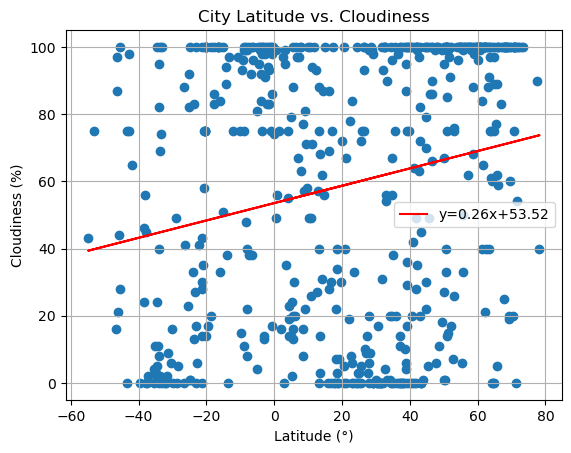

In [29]:
#Compute linear regression for latitude vs. cloudiness
x_values = city_data_df["Lat"]
y_values = city_data_df["Cloudiness"]

correlation = round(st.pearsonr(x_values, y_values)[0],2)
print(f'The correlation between latitude and cloudiness is {correlation}')

(slope, intercept, r, p, se) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Build scatter plot + regression line for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker = "o")
plt.plot(x_values, regress_values, "r-", label= "y={:.2f}x+{:.2f}".format(slope,intercept))

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude (°)")
plt.grid(True)
plt.legend()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

The correlation between latitude and wind speed is 0.11


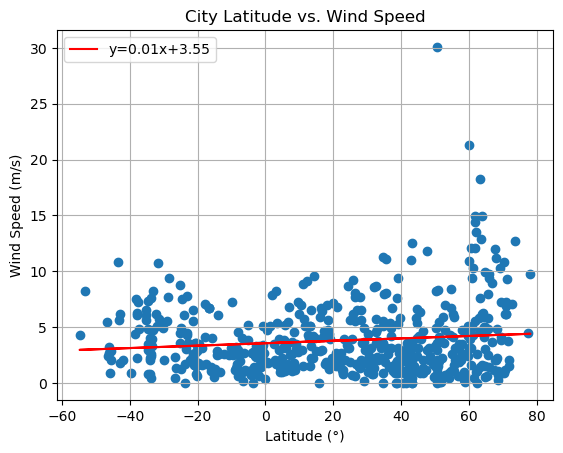

In [15]:
#Compute linear regression for latitude vs. wind speed
x_values = city_data_df["Lat"]
y_values = city_data_df["Wind Speed"]

correlation = round(st.pearsonr(x_values, y_values)[0],2)
print(f'The correlation between latitude and wind speed is {correlation}')

(slope, intercept, r, p, se) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Build scatter plot + regression line for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker = "o")
plt.plot(x_values, regress_values, "r-", label= "y={:.2f}x+{:.2f}".format(slope,intercept))

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed")
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude (°)")
plt.grid(True)
plt.legend()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [16]:
# Define a function to create Linear Regression plots
def LinRegPlot(x_values, y_values, x_label, y_label):

    (slope, intercept, r, p, se) = st.linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Plot regression line and scatter plot
    plt.plot(x_values, regress_values, "r-", label= "y={:.2f}x+{:.2f}".format(slope,intercept))
    plt.scatter(x_values, y_values)
    
    #Incorporate the other graph properties
    plt.ylabel(y_label)
    plt.xlabel(x_label)
    plt.legend()
    print(f"Pearson r: {r}")
    plt.show()

In [17]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"]>=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,butaritari,3.0707,172.7902,27.23,79,99,8.19,KI,1674619315
1,saint george,37.1041,-113.5841,4.41,46,14,3.13,US,1674619026
2,dikson,73.5069,80.5464,-18.42,93,100,12.67,RU,1674619316
3,yining,29.0361,114.5636,6.24,33,0,0.17,CN,1674619316
4,lucea,18.4510,-78.1736,23.25,73,34,4.76,JM,1674619317


In [18]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"]<0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
10,punta arenas,-53.1500,-70.9167,10.06,53,75,8.23,CL,1674618532
13,rocha,-34.4833,-54.3333,18.13,66,100,2.98,UY,1674619322
14,kaitangata,-46.2817,169.8464,17.23,74,87,2.39,NZ,1674619323
16,east london,-33.0153,27.9116,19.49,83,100,4.78,ZA,1674619278
17,new norfolk,-42.7826,147.0587,25.40,42,98,1.79,AU,1674619325


###  Temperature vs. Latitude Linear Regression Plot

Pearson r: -0.8230322690880776


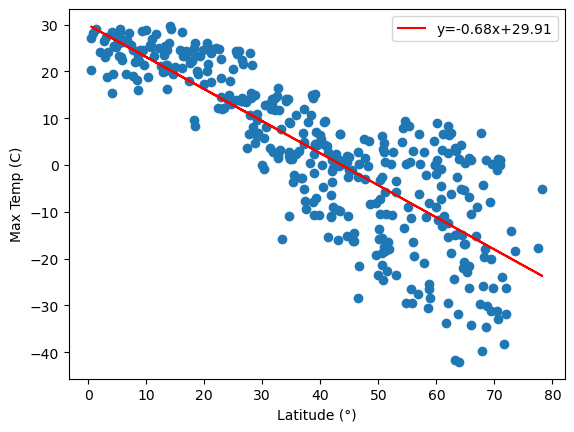

In [19]:
# Linear regression on Northern Hemisphere
LinRegPlot(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"], "Latitude (°)", "Max Temp (C)")

Pearson r: 0.375968739423195


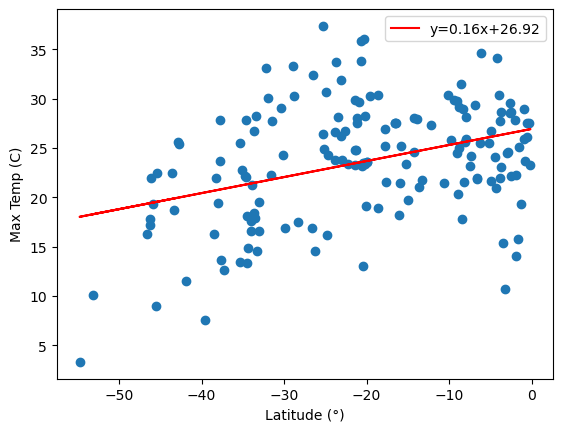

In [21]:
# Linear regression on Southern Hemisphere
LinRegPlot(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"], "Latitude (°)", "Max Temp (C)")

**Discussion about the linear relationship:** The northern hemisphere sees a strong, negative correlation between latitude and temperature; meaning, as latitude increases, the temperature will decrease.  In the southern hemisphere, the opposite is more likely, as there is a moderate positive correlation between latitude and temperature.

### Humidity vs. Latitude Linear Regression Plot

Pearson r: 0.3949932674242472


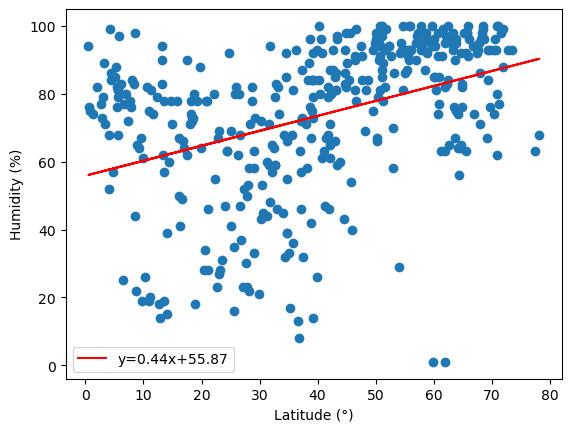

In [22]:
# Northern Hemisphere
LinRegPlot(northern_hemi_df["Lat"], northern_hemi_df["Humidity"], "Latitude (°)", "Humidity (%)")

Pearson r: 0.41345007758997154


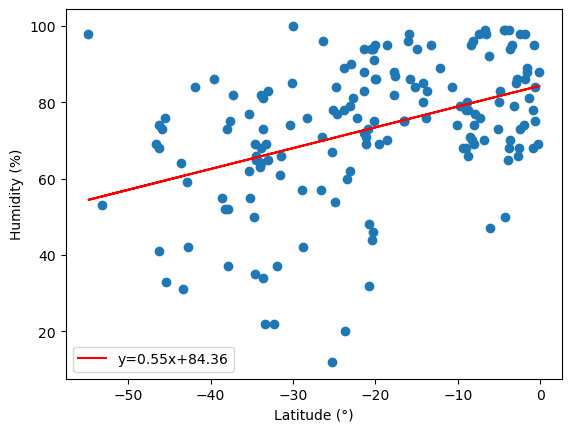

In [23]:
# Southern Hemisphere
LinRegPlot(southern_hemi_df["Lat"], southern_hemi_df["Humidity"], "Latitude (°)", "Humidity (%)")

**Discussion about the linear relationship:** Latitude and humidity are moderately, positively coorelated in both the northern and southern hemispheres. This suggests that humidity will increase as latitude increases.

### Cloudiness vs. Latitude Linear Regression Plot

Pearson r: 0.3339081006866293


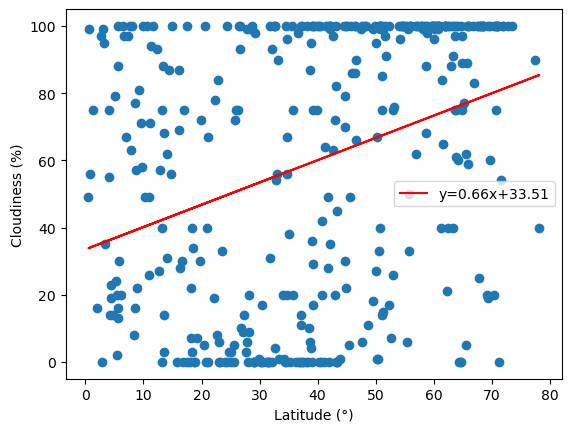

In [30]:
# Northern Hemisphere
LinRegPlot(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"], "Latitude (°)", "Cloudiness (%)")

Pearson r: 0.4210556303398484


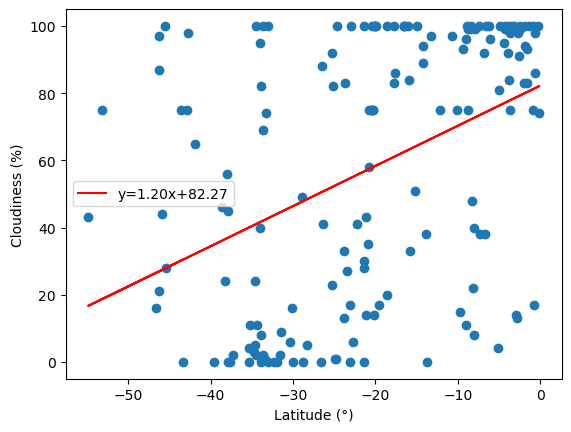

In [31]:
# Southern Hemisphere
LinRegPlot(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"], "Latitude (°)", "Cloudiness (%)")

**Discussion about the linear relationship:** Latitude and cloudiness are moderately, positively coorelated in both the northern and southern hemispheres; however, the relationship is slightly stronger in the southern hemisphere.  This means: as latitude increases, cloudiness increases as well.

### Wind Speed vs. Latitude Linear Regression Plot

Pearson r: 0.15768027267001122


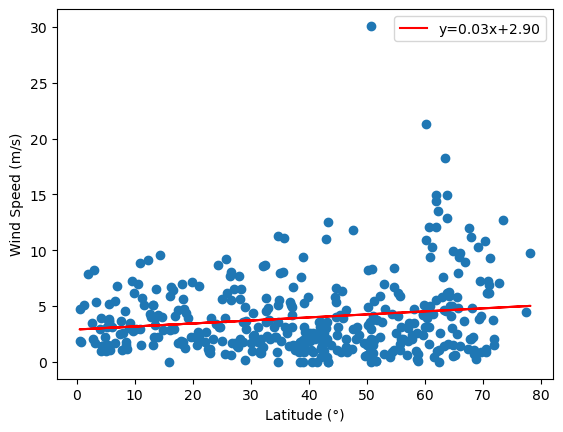

In [27]:
# Northern Hemisphere
LinRegPlot(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"], "Latitude (°)", "Wind Speed (m/s)")

Pearson r: -0.38004306890217576


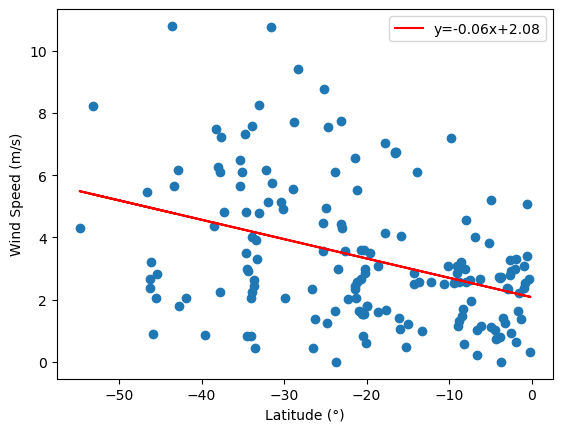

In [28]:
# Southern Hemisphere
LinRegPlot(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"], "Latitude (°)", "Wind Speed (m/s)")

**Discussion about the linear relationship:** While there little relationship between latitude and wind speed in the northern hemisphere, the relationship is moderate and negative in the southern hemisphere.  This means that, in the southern hemisphere, as latitude increases, wind speed decreases.